<a href="https://colab.research.google.com/github/Surichn/DSAI/blob/main/DS/TA/NLP/NLP8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Generation

1. Create a Corpus- break the text down to list of sentences
2. Create a word_index(vocabulary) from the text
3. Tokenize the data and create n-gram sequence for each sequences of the corpus
4. Pad those sentences
5. Segregate features from the sequences by reserving the last element of array as labels

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Step 1: Create a Corpus

In [3]:
data = "October arrived, spreading a damp chill over the grounds and into the castle. Madam Pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff and students. Her Pepperup potion worked instantly, though it left the drinker smoking at the ears for several hours afterward. Ginny Weasley, who had been looking pale, was bullied into taking some by Percy. The steam pouring from under her vivid hair gave the impression that her whole head was on fire."

In [4]:
tokenizer = Tokenizer()

# Create corpus by lowering the letters and splitting the text by \n

corpus = data.lower().split("\n")

print(corpus)

['october arrived, spreading a damp chill over the grounds and into the castle. madam pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff and students. her pepperup potion worked instantly, though it left the drinker smoking at the ears for several hours afterward. ginny weasley, who had been looking pale, was bullied into taking some by percy. the steam pouring from under her vivid hair gave the impression that her whole head was on fire.']


Step 2: Train the Tokenizer and create word encoding dictionary

In [5]:
tokenizer.fit_on_texts(corpus)

vocab_size = len(tokenizer.word_index) + 1 # for <oov> token

print(tokenizer.word_index)
print(vocab_size)

{'the': 1, 'was': 2, 'her': 3, 'a': 4, 'and': 5, 'into': 6, 'by': 7, 'october': 8, 'arrived': 9, 'spreading': 10, 'damp': 11, 'chill': 12, 'over': 13, 'grounds': 14, 'castle': 15, 'madam': 16, 'pomfrey': 17, 'nurse': 18, 'kept': 19, 'busy': 20, 'sudden': 21, 'spate': 22, 'of': 23, 'colds': 24, 'among': 25, 'staff': 26, 'students': 27, 'pepperup': 28, 'potion': 29, 'worked': 30, 'instantly': 31, 'though': 32, 'it': 33, 'left': 34, 'drinker': 35, 'smoking': 36, 'at': 37, 'ears': 38, 'for': 39, 'several': 40, 'hours': 41, 'afterward': 42, 'ginny': 43, 'weasley': 44, 'who': 45, 'had': 46, 'been': 47, 'looking': 48, 'pale': 49, 'bullied': 50, 'taking': 51, 'some': 52, 'percy': 53, 'steam': 54, 'pouring': 55, 'from': 56, 'under': 57, 'vivid': 58, 'hair': 59, 'gave': 60, 'impression': 61, 'that': 62, 'whole': 63, 'head': 64, 'on': 65, 'fire': 66}
67


Step 3: Create n-gram sequene

In [6]:
input_sequences = []

for line in corpus:
  tokens = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(tokens)):
    n_gram_sequence = tokens[:i+1]
    input_sequences.append(n_gram_sequence)
                          

In [7]:
# Pad sequences

max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences,maxlen = max_seq_len, padding="pre"))


Step 4: Extract features and labels

In [8]:
# Crete features(X) and labels(Y)

X = input_seq_array[:,:-1]
labels = input_seq_array[:,-1]

#one-hot encode the labels to get y
y= tf.keras.utils.to_categorical(labels,num_classes = vocab_size) 

In [11]:
print(tokenizer.word_index['colds'])
print(X[0])
print(y[0])

24
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 8]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Define the LSTM model

In [13]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,64,input_length = max_seq_len-1),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
                             tf.keras.layers.Dense(vocab_size,activation ='softmax') # vocab_size - # of classes to predict, activation - Softmax - Multi class problem
                             
])

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs = 500,verbose=1)

Epoch 1/500
3/3 [==============================] - 4s 56ms/step - loss: 4.2090 - accuracy: 0.0125
Epoch 2/500
3/3 [==============================] - 0s 56ms/step - loss: 4.1998 - accuracy: 0.0375
Epoch 3/500
3/3 [==============================] - 0s 54ms/step - loss: 4.1930 - accuracy: 0.1125
Epoch 4/500
3/3 [==============================] - 0s 65ms/step - loss: 4.1862 - accuracy: 0.1000
Epoch 5/500
3/3 [==============================] - 0s 52ms/step - loss: 4.1791 - accuracy: 0.1000
Epoch 6/500
3/3 [==============================] - 0s 56ms/step - loss: 4.1723 - accuracy: 0.1000
Epoch 7/500
3/3 [==============================] - 0s 65ms/step - loss: 4.1629 - accuracy: 0.1000
Epoch 8/500
3/3 [==============================] - 0s 56ms/step - loss: 4.1530 - accuracy: 0.1000
Epoch 9/500
3/3 [==============================] - 0s 53ms/step - loss: 4.1418 - accuracy: 0.1000
Epoch 10/500
3/3 [==============================] - 0s 54ms/step - loss: 4.1262 - accuracy: 0.1000
Epoch 11/500
3/3 [=

Visualize the metrics

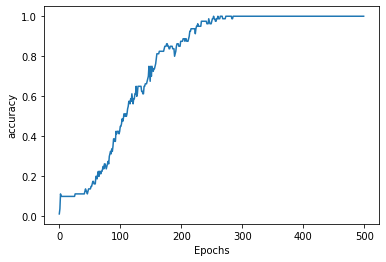

In [15]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

plot_graphs(history,"accuracy")


Generate new Text

In [21]:
seed_text = "It was a cold night."

# add number of words to predict

next_words = 10

# run the loop to predict and concatenate the word

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list],maxlen=max_seq_len-1,padding='pre')

  # predict the class using the trained model
  predicted = model.predict(token_list,verbose=0)
  y_classes = predicted.argmax(axis=-1)
  output_word=""
  for word,index in tokenizer.word_index.items():
    if index == y_classes:
      output_word = word
      break
  seed_text += " " + output_word

print(seed_text)

It was a cold night. damp chill over the grounds and into the castle madam
